In [1]:
import numpy as np
import os
from os.path import isfile, join, exists
import matplotlib.pyplot as plt
from matplotlib.collections import LineCollection
from mpl_toolkits import mplot3d
%matplotlib inline


from IPython.core.debugger import set_trace
from tqdm import tqdm

from sklearn.manifold import MDS
from sklearn.decomposition import PCA as PCA
from sklearn.decomposition import IncrementalPCA
import time

import importlib
import nnutils as utils
import rsatools as rsa

importlib.reload(utils)
importlib.reload(rsa)

<module 'rsatools' from '/home/jacobpri/git/RotspaceIT/notebooks/rsatools.py'>

# faces, buildings, hammers... only including every other conv layer

In [ ]:
_ = PCA_MDS_experiment(layers_to_include = ['conv1','conv3','conv5','fc7'], 
                   img_domains = [0,3,6], 
                   nPCs = 75, 
                   linewidths = [1,2,5,8])

# faces, buildings, hammers... only including every other relu layer

In [ ]:
_ = PCA_MDS_experiment(layers_to_include = ['relu1','relu3','relu5','relu7'], 
                   img_domains = [0,3,6], 
                   nPCs = 75, 
                   linewidths = [1,2,5,8])

# faces, buildings, hammers... including all relus

In [ ]:
_ = PCA_MDS_experiment(layers_to_include = ['relu1','relu2','relu3','relu4','relu5','relu6','relu7'], 
                   img_domains = [0,3,6], 
                   nPCs = 75, 
                   linewidths = [0.01, 0.1, 1, 2, 3, 5, 8])

# all categories, every other relu

In [ ]:
_ = coords = PCA_MDS_experiment(layers_to_include = ['relu1','relu3','relu5','relu7'], 
                   img_domains = [0,1,2,3,4,5,6,7], 
                   nPCs = 75, 
                   linewidths = [1, 2, 5, 8])

In [ ]:

fig = plt.figure(figsize=(12,12))
ax = plt.axes(projection="3d")

z_line = np.linspace(0, 15, 1000)
x_line = np.cos(z_line)
y_line = np.sin(z_line)
ax.plot3D(x_line, y_line, z_line, 'gray')

z_points = 15 * np.random.random(100)
x_points = np.cos(z_points) + 0.1 * np.random.randn(100)
y_points = np.sin(z_points) + 0.1 * np.random.randn(100)
ax.scatter3D(x_points, y_points, z_points, c=z_points, cmap='hsv');

plt.show()

100%|██████████| 21/21 [00:01<00:00, 12.08it/s]


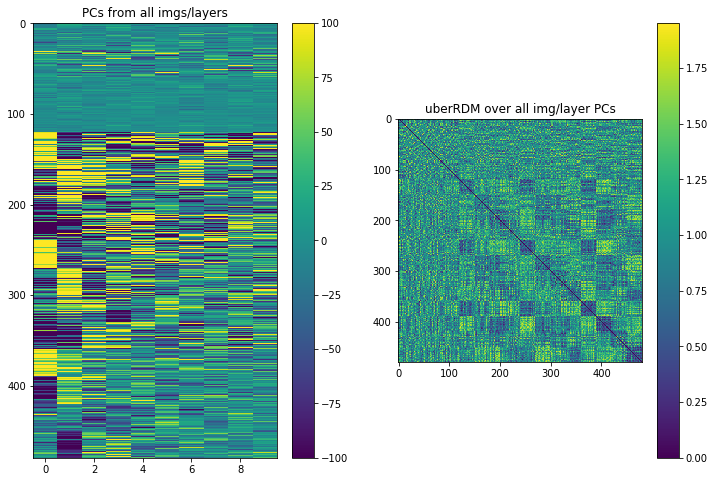

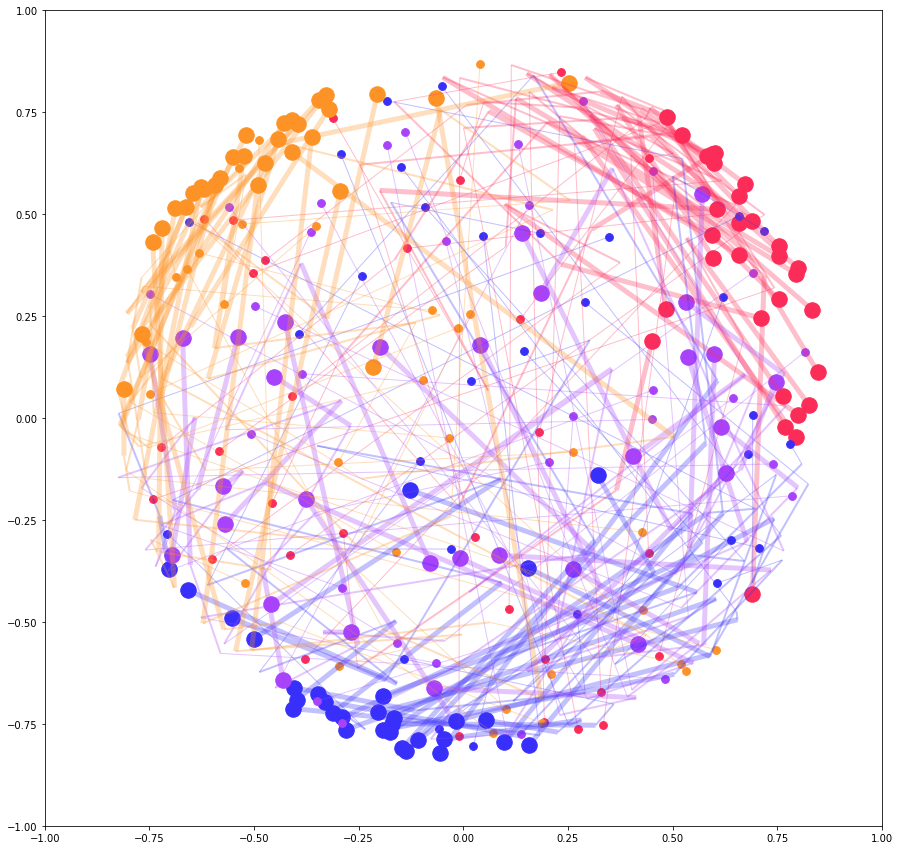

In [29]:
layers_to_include = ['conv1','conv3','conv5','fc7']
img_domains = [0,3,2,6]
nPCs = 10
linewidths = [1, 2, 5, 8]

mds_coords = PCA_MDS_experiment(layers_to_include, 
                   img_domains, 
                   nPCs, 
                   linewidths,
                   drawplots = True)



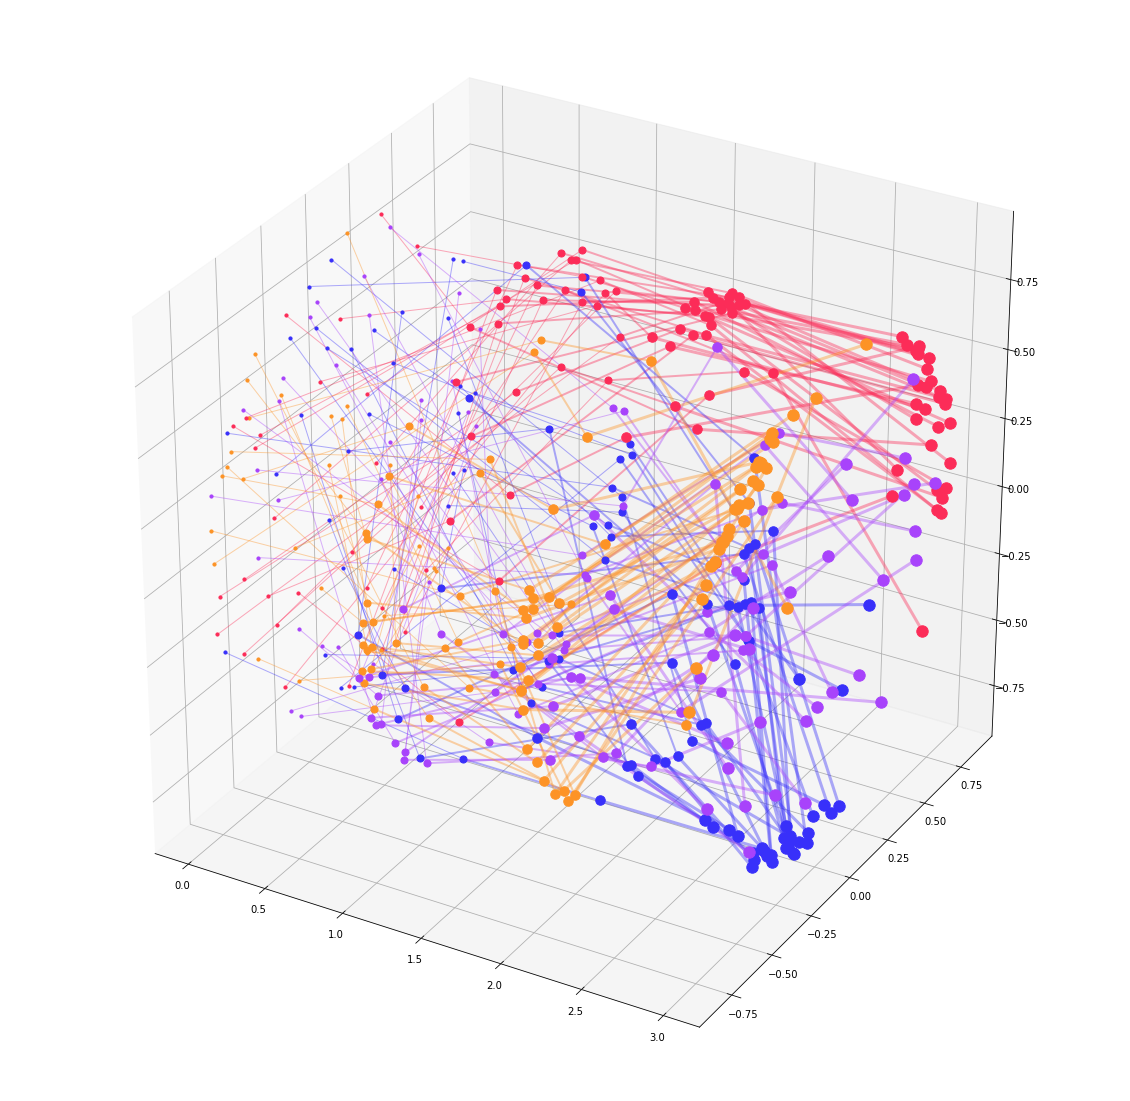

In [31]:

categ_colors = np.array([[0.988235294117647, 0.172549019607843, 0.345098039215686],
[0.988235294117647, 0.305882352941177, 0.670588235294118],
[0.658823529411765, 0.262745098039216, 0.984313725490196],
[0.219607843137255, 0.188235294117647, 0.980392156862745],
[0.423529411764706, 0.666666666666667, 0.988235294117647],
[0.184313725490196, 0.901960784313726, 1],
[0.992156862745098, 0.576470588235294, 0.149019607843137],
[0.996078431372549, 0.909803921568627, 0.227450980392157]])

categ_colors = categ_colors[np.array(img_domains)]
nimg = 30*len(img_domains)

fig = plt.subplots(figsize=(20,20))
a = plt.axes(projection="3d")

linewidths = [1, 2, 3, 4]

for i in range(nimg):
    indices = np.arange(i,mds_coords.shape[0],nimg)
    subset = mds_coords[indices,:]
    for j in range(subset.shape[0]):
        a.scatter3D(j, subset[j,0], subset[j,1], c=categ_colors[int(i/30)].reshape(1,3), s=40*j+10)
        if j < subset.shape[0]-1:
            a.plot3D([j, j+1], [subset[j,0], subset[j+1,0]], [subset[j,1], subset[j+1,1]],
                    color=categ_colors[int(i/30)],alpha=0.4,linewidth=linewidths[j])
            

# all categories, relu3 and relu7 only

In [ ]:
PCA_MDS_experiment(layers_to_include = ['relu3','relu7'], 
                   img_domains = [0,1,2,3,4,5,6,7], 
                   nPCs = 75, 
                   linewidths = [2, 5])

In [ ]:
PCA_MDS_experiment(layers_to_include = ['conv1','conv3','conv5','fc7'], 
                   img_domains = [1,6,7], 
                   nPCs = 75, 
                   linewidths = [1,2,5,8])

In [ ]:
# example of small image set with data from 20 units
x1 = np.random.normal(0,1,(50,20))

# example of larger image set with data from same # units
x2 = np.random.normal(0,1,(500,20))

# first, fit the model on the large image set
pca = PCA(n_components=10)
pca.fit(x2)

# data from the small image set can easily be projected into the PC space of the large image set
print(pca.transform(x2).shape)
print(pca.transform(x1).shape)


In [43]:
times = []
times2 = []
errs = []
nimg = 5000
for units in [200000]:#, 25000, 50000]:
    
    X = np.random.normal(0,1,(nimg,units))
    n_components = 100
    t1 = time.time()
    ipca = IncrementalPCA(n_components=n_components, batch_size=100)
    ipca.fit(X)
    t2 = time.time()
    times.append(t2-t1)
    print(t2-t1)
#     t3 = time.time()
#     pca = PCA(n_components=n_components)
#     pca.fit(X)
#     t4 = time.time()
#     times2.append(t4-t3)
#     print(t4-t3)
    
    
    #X_ipca = ipca.fit_transform(X)
    

/home/jacobpri/Gating/myenv/lib/python3.6/site-packages/sklearn/decomposition/incremental_pca.py:294: RuntimeWarning: Mean of empty slice.
  explained_variance[self.n_components_:].mean()
/home/jacobpri/Gating/myenv/lib/python3.6/site-packages/numpy/core/_methods.py:161: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


654.9102087020874


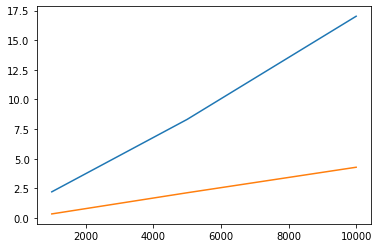

In [42]:
plt.plot([1000, 5000, 10000],times)
plt.plot([1000, 5000, 10000],times2)

# MDS with animacy/size/texform stimuli: where do faces and buildings situate?

In [92]:
def anim_size_texform_mds(mode, incl_layers,figsize=(50,8),dotsize=100):
    
    rdm_dir = '/home/jacobpri/git/RotspaceIT/data/d02_modeling/rdvs/alexnet-object/experimental/anim-size-texform/dim224/'

    fns = np.load(join(rdm_dir,'absolute_rdv_filepaths_batchsize-40.npy'))

    if mode == 'only_texforms':
        incl_idx = np.arange(180,300)
        categs = ['tf-big-animals','tf-big-objects','tf-small-animals','tf-small-objects']
        colors = np.repeat(['plum','lightskyblue','plum','navajowhite'],30)

    elif mode == 'only_originals':
        incl_idx = np.arange(60,180)
        categs = ['big-animals','big-objects','small-animals','small-objects']
        colors = np.repeat(['mediumorchid','dodgerblue','mediumorchid','orange'],30)
        
    elif mode == 'texforms_and_originals':
        incl_idx = np.arange(60,300)
        categs = ['big-animals','big-objects','small-animals','small-objects','tf-big-animals','tf-big-objects','tf-small-animals','tf-small-objects']
        colors = np.repeat(['mediumorchid','dodgerblue','mediumorchid','orange','plum','lightskyblue','plum','navajowhite'],30)

    elif mode == 'texforms_with_mc':
        incl_idx = np.concatenate((np.arange(0,60), np.arange(180,300)))
        categs = ['faces','buildings','tf-big-animals','tf-big-objects','tf-small-animals','tf-small-objects']
        colors = np.repeat(['red','limegreen','plum','lightskyblue','plum','navajowhite'],30)

    elif mode == 'originals_with_mc':
        incl_idx = np.arange(0,180)
        categs = ['faces','buildings','big-animals','big-objects','small-animals','small-objects']
        colors = np.repeat(['red','limegreen','mediumorchid','dodgerblue','mediumorchid','orange'],30)

    elif mode == 'all':
        incl_idx = np.arange(0,300)
        categs = ['faces','buildings','big-animals','big-objects','small-animals','small-objects','tf-big-animals','tf-big-objects','tf-small-animals','tf-small-objects']
        colors = np.repeat(['red','limegreen','mediumorchid','dodgerblue','mediumorchid','orange','plum','lightskyblue','plum','navajowhite'],30)
                           
    layer_rdms = []
    layers = []
    for fn in fns:

        rdm = rsa.v2m(np.load(fn))
        layer_rdms.append(rsa.subsample_dm(rdm, incl_idx))

        layers.append(fn.split('_')[2])
                
    n = len(incl_layers)
    seed = 365

    plt.figure(figsize=figsize)

    c = 1
    for i in range(len(layers)):
        if layers[i] in incl_layers:
            rdm = layer_rdms[i]

            mds = MDS(n_components=2,dissimilarity='precomputed',random_state=seed)
            mds_coords = mds.fit_transform(rdm)

            if len(incl_layers) > 1:
                plt.subplot(1,n,c)
            plt.scatter(mds_coords[:,0],mds_coords[:,1],dotsize,color=colors)
            plt.axis('square')
            plt.title(layers[i],fontsize=24)
            plt.axis('off')
            plt.xlim([-1, 1])
            plt.ylim([-1, 1])
            c+=1
    plt.show()
            

# just big objects (blue), small objects (orange), animals (purple)
## ...with and without texforms (lighter colors)
## ...conv and fc layers only

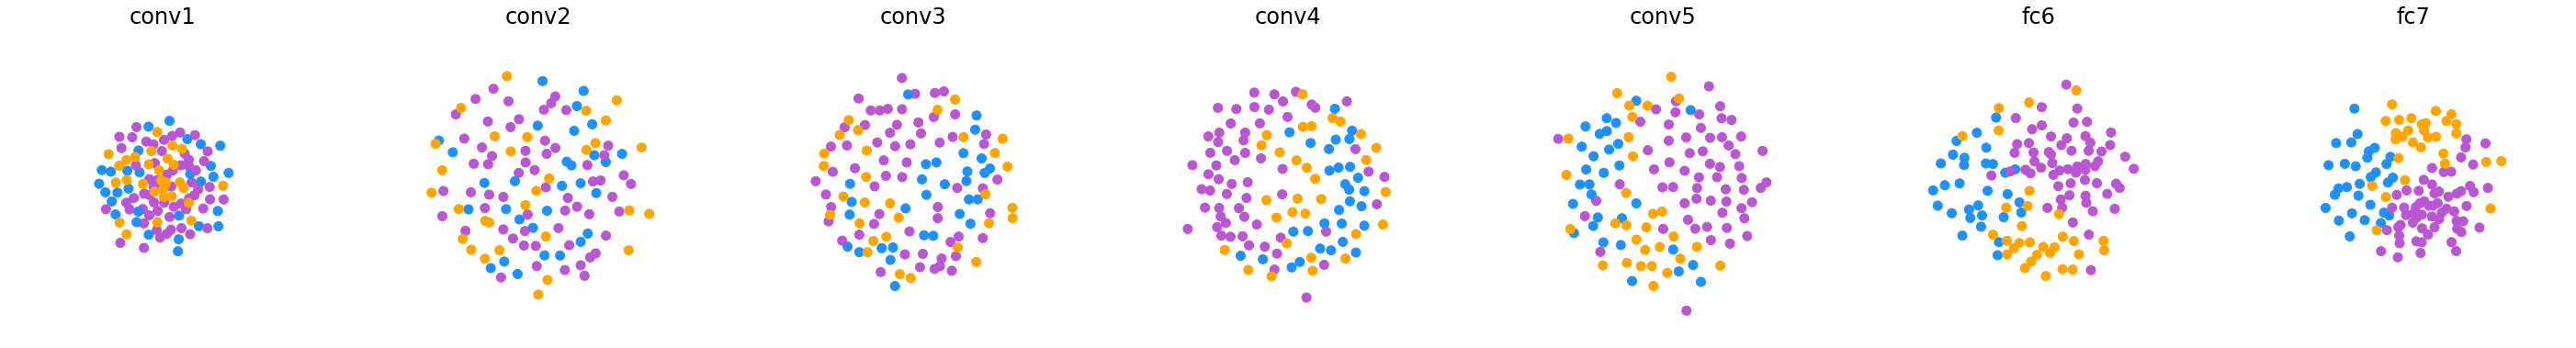

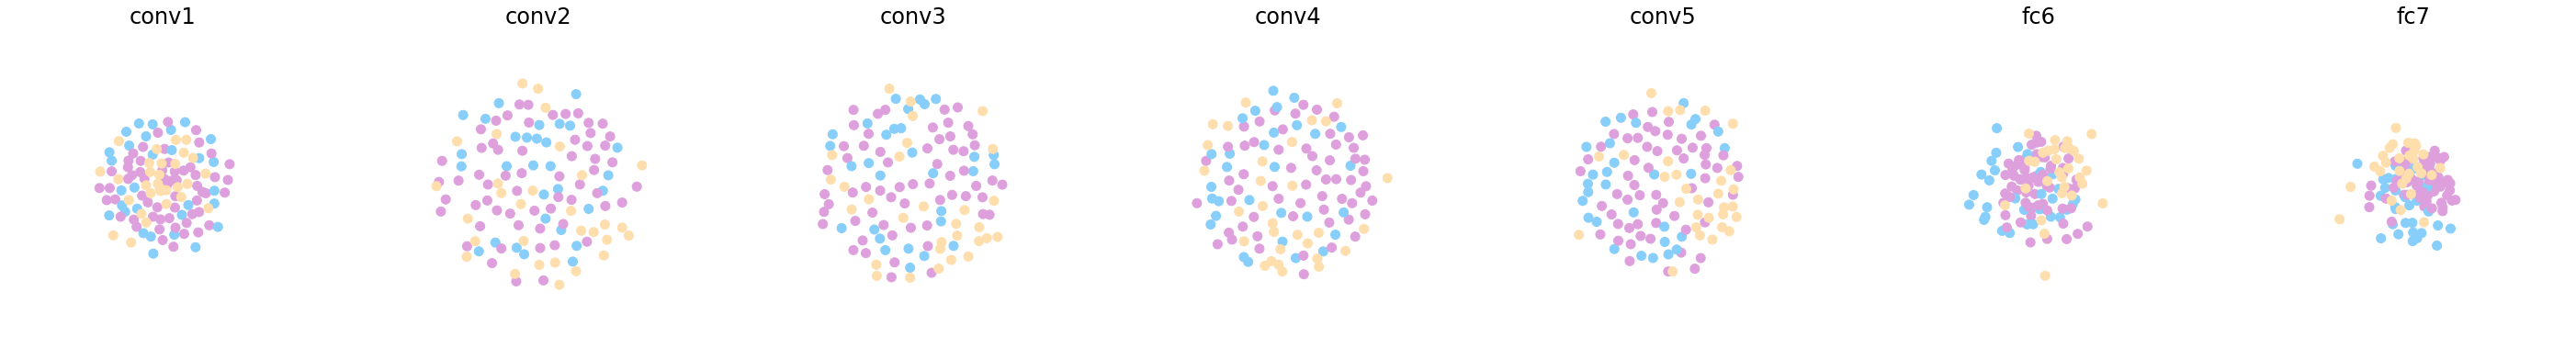

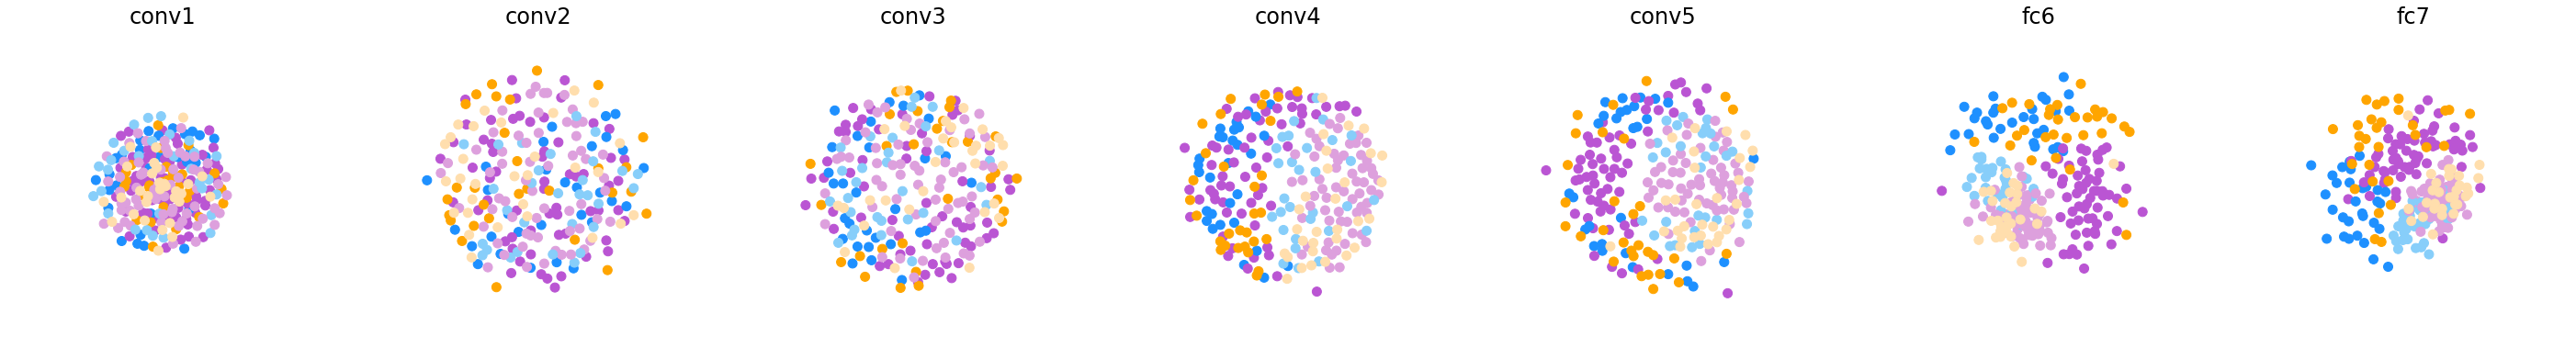

In [87]:
incl_layers = [layer for layer in layers if 'conv' in layer or 'fc' in layer][:-1]
anim_size_texform_mds('only_originals',incl_layers)
anim_size_texform_mds('only_texforms',incl_layers)
anim_size_texform_mds('texforms_and_originals',incl_layers)

    

# just big objects (blue), small objects (orange), animals (purple)
## ...with and without texforms
## ...NOW, relu layers only

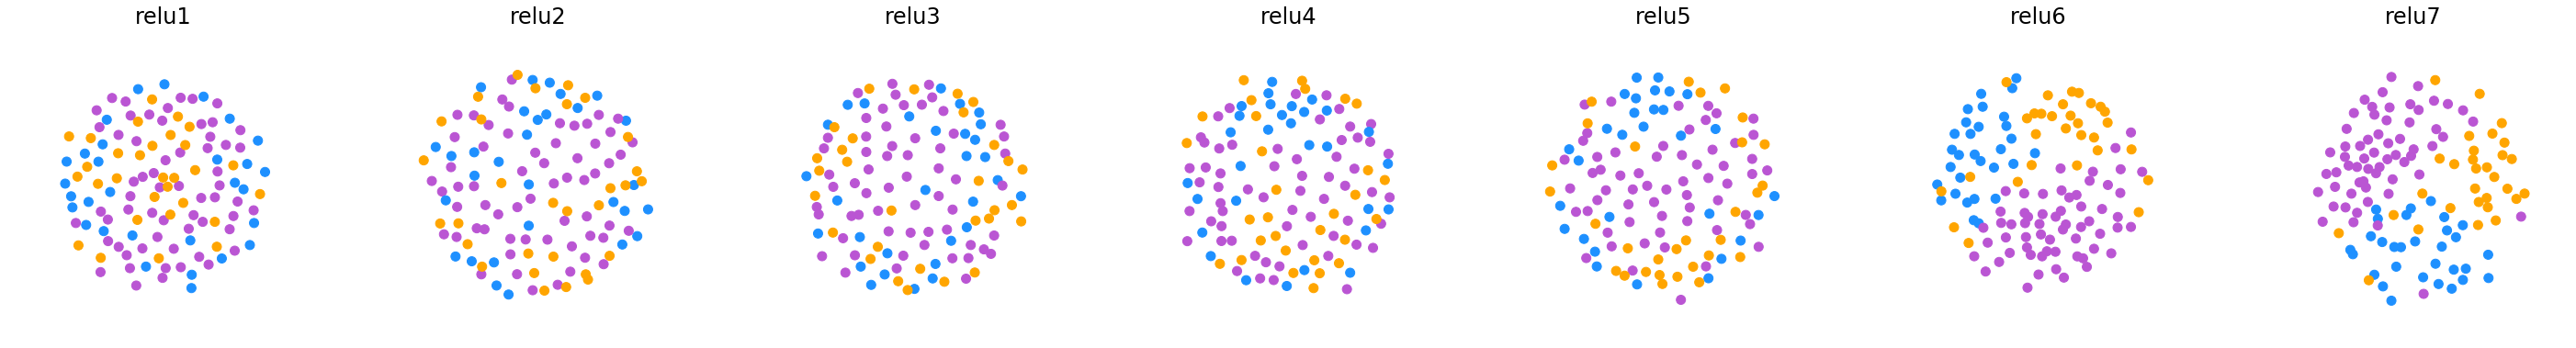

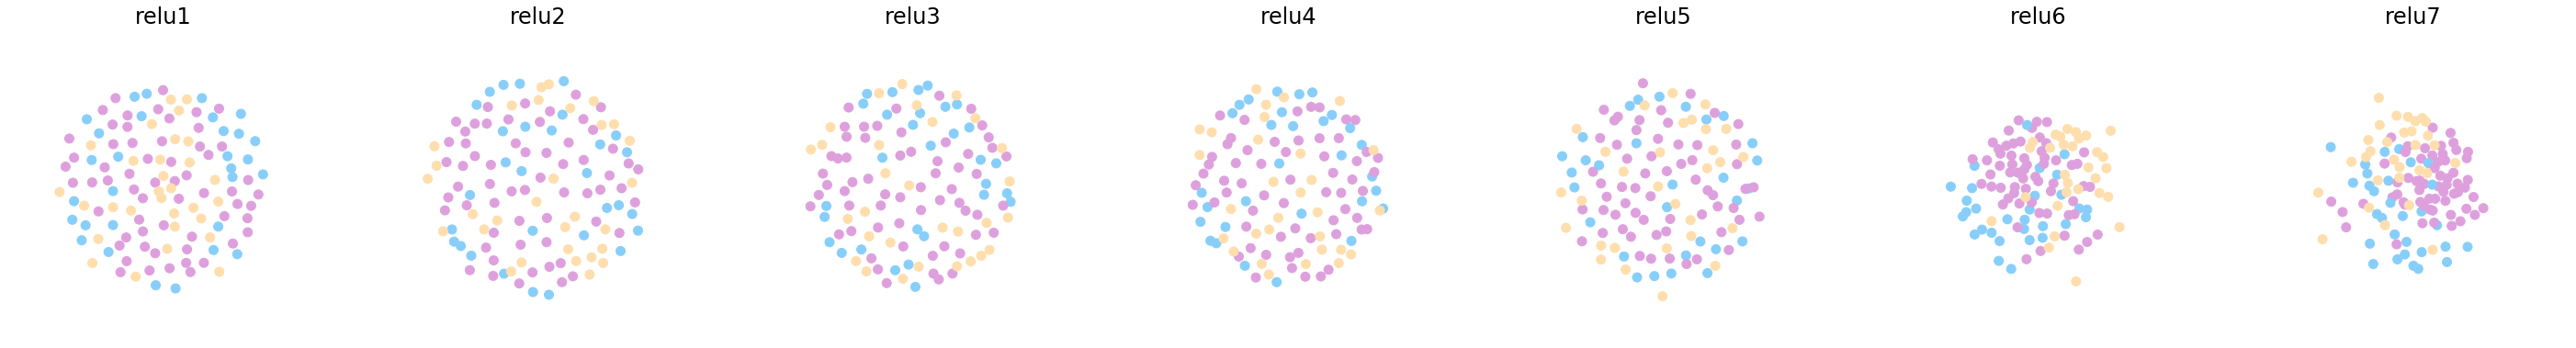

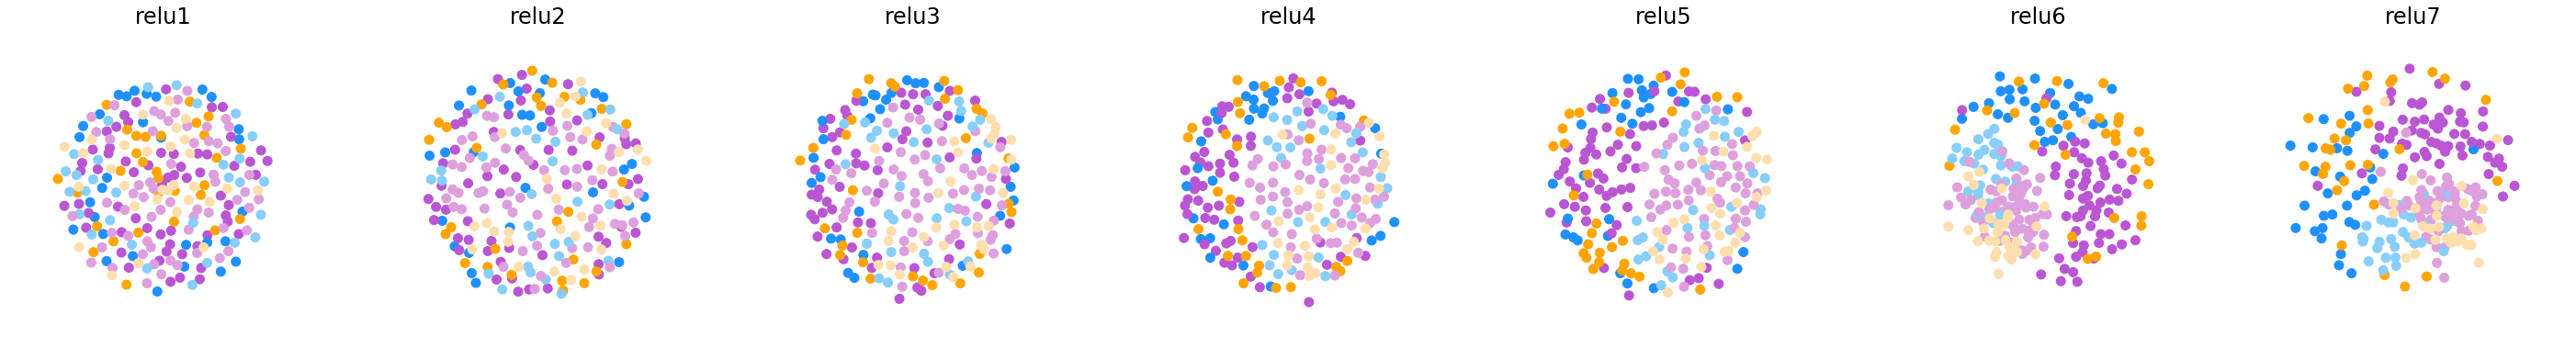

In [83]:
incl_layers = [layer for layer in layers if 'relu' in layer]
anim_size_texform_mds('only_originals',incl_layers)
anim_size_texform_mds('only_texforms',incl_layers)
anim_size_texform_mds('texforms_and_originals',incl_layers)


# mc8-faces (red), mc8-buildings (green), big objects (blue), small objects (orange), animals (purple)
## ...with and without texforms
## ...conv and fc layers only

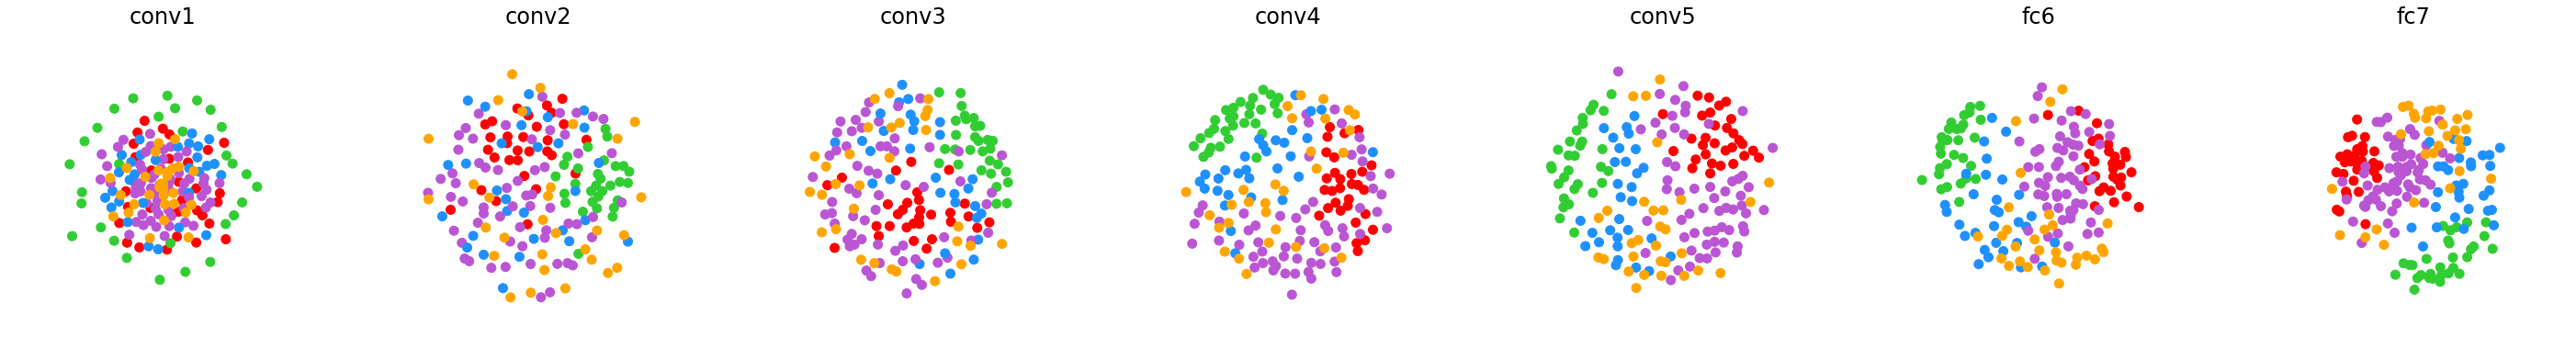

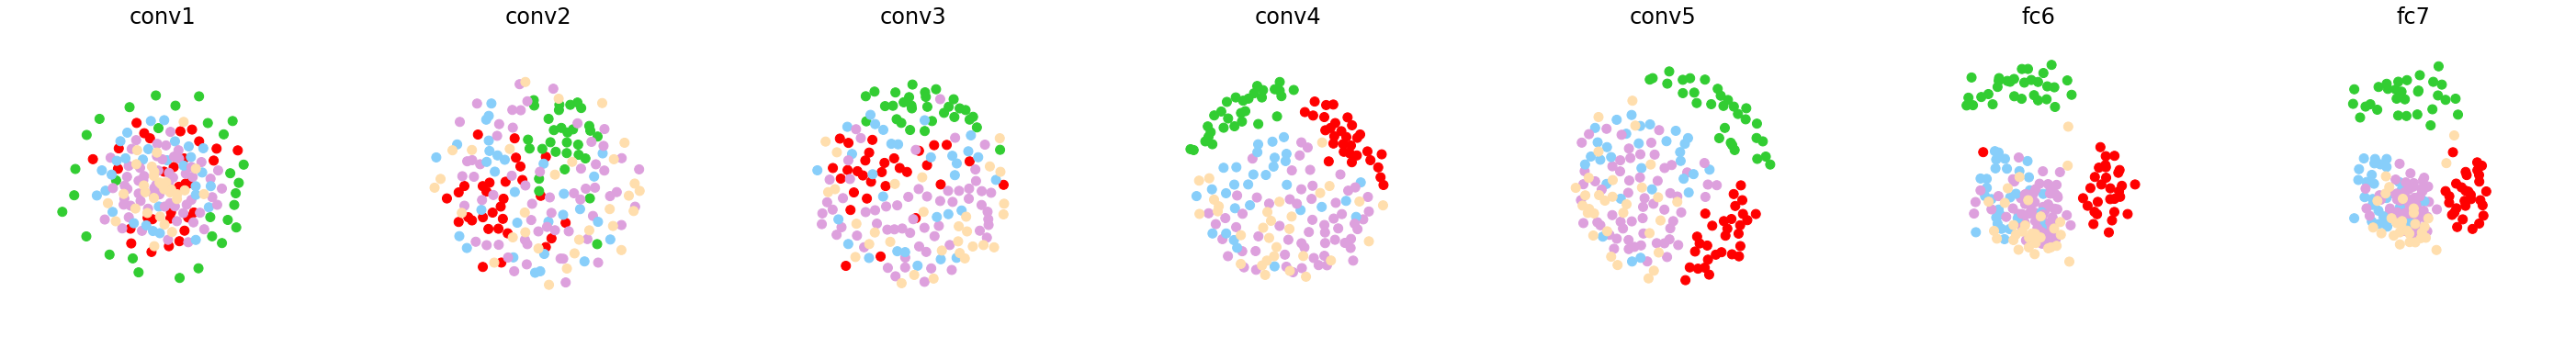

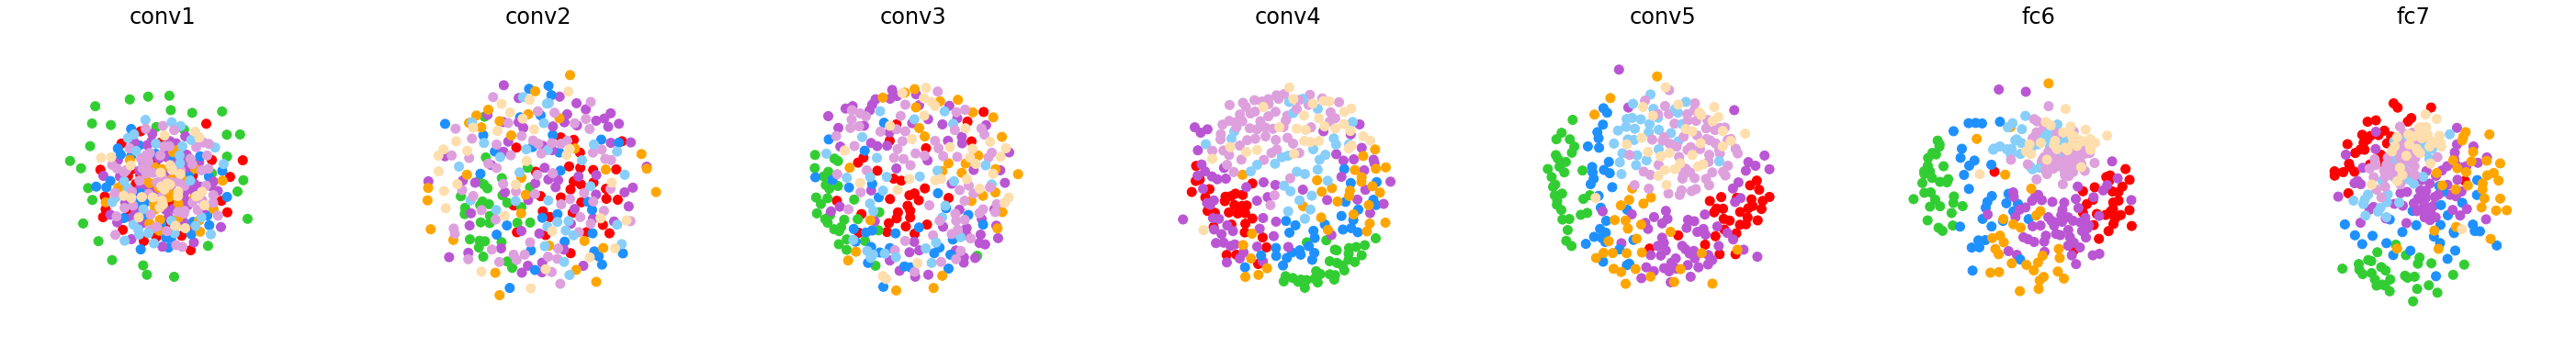

In [88]:
incl_layers = [layer for layer in layers if 'conv' in layer or 'fc' in layer][:-1]
anim_size_texform_mds('originals_with_mc',incl_layers)
anim_size_texform_mds('texforms_with_mc',incl_layers)
anim_size_texform_mds('all',incl_layers)


# mc8-faces (red), mc8-buildings (green), big objects (blue), small objects (orange), animals (purple)
## ...with and without texforms
## ...NOW, relu layers only

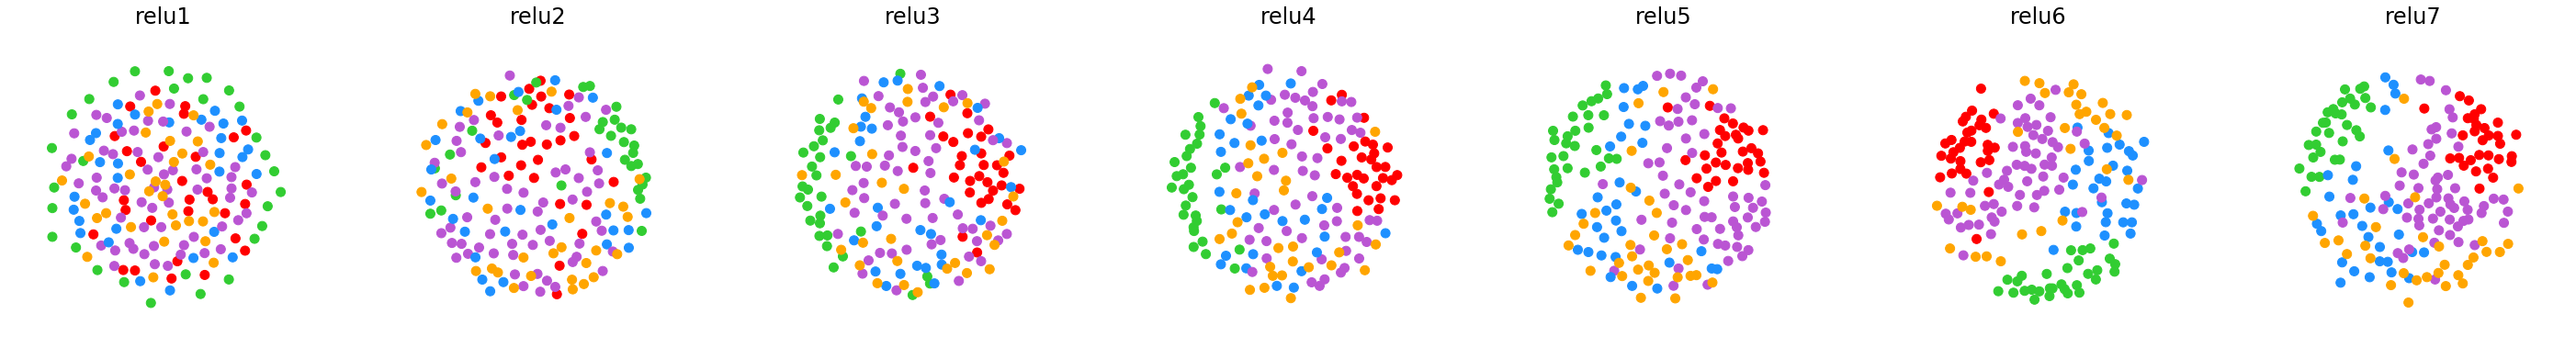

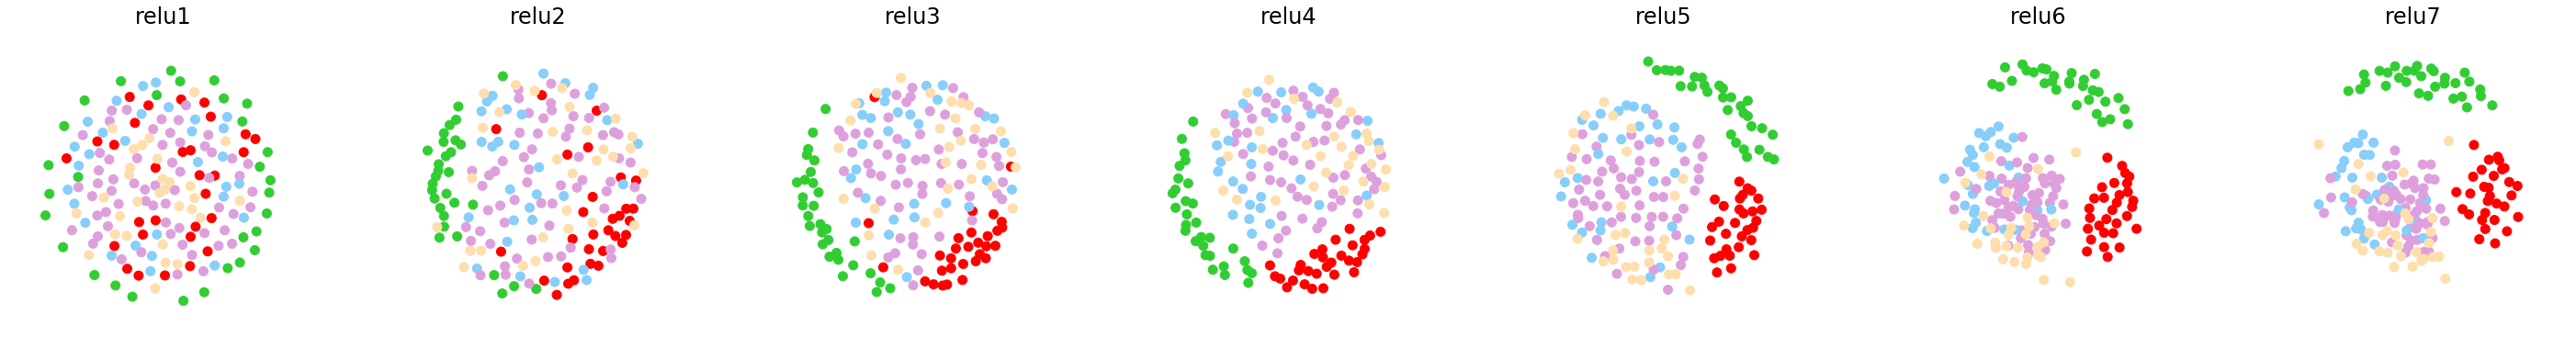

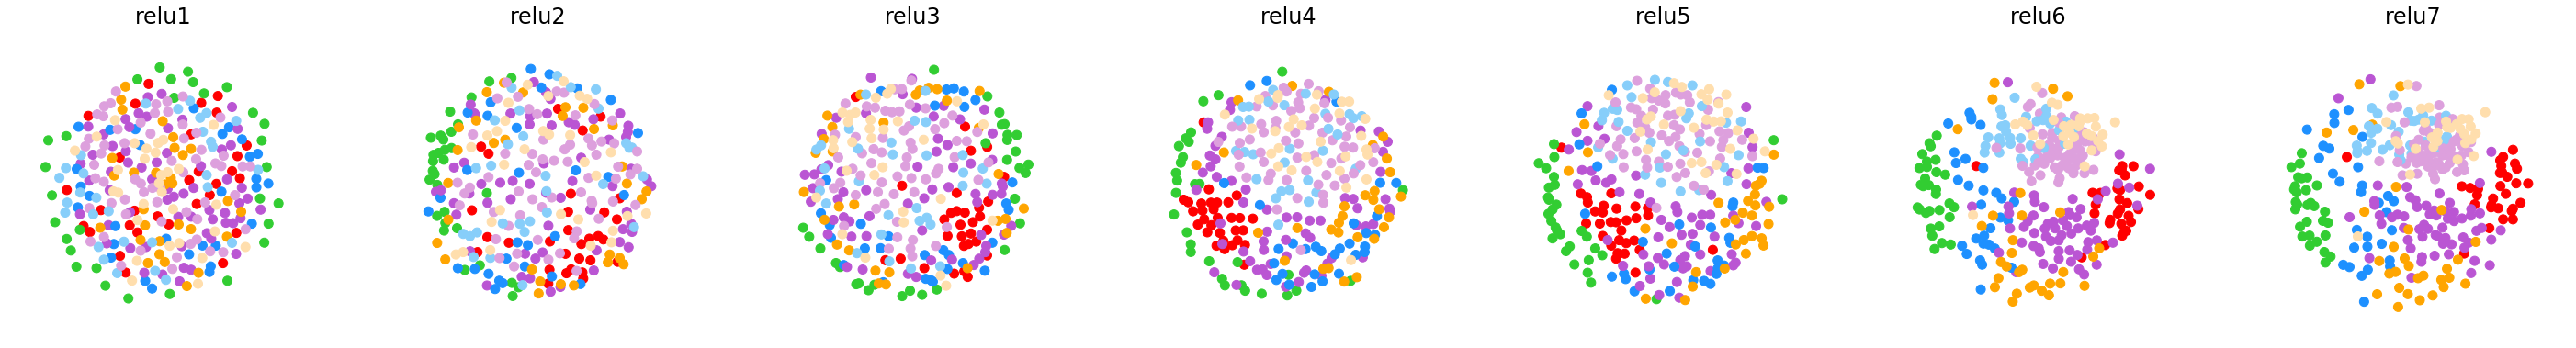

In [89]:
incl_layers = [layer for layer in layers if 'relu' in layer]
anim_size_texform_mds('originals_with_mc',incl_layers)
anim_size_texform_mds('texforms_with_mc',incl_layers)
anim_size_texform_mds('all',incl_layers)

# some layers of interest...

## conv5, showing relative closeness of faces to animals and buildings to large objects...

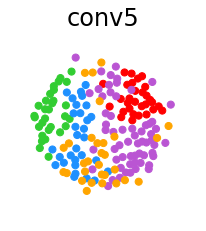

In [103]:
incl_layers = [layer for layer in layers if 'conv' in layer or 'fc' in layer][:-1][4]
anim_size_texform_mds('originals_with_mc',incl_layers,figsize=(20,20),dotsize=50)

## fc7, showing relative closeness of faces to animals and buildings to large objects...

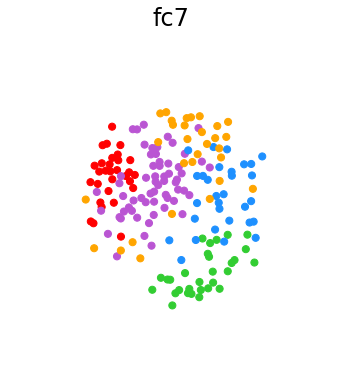

In [112]:
incl_layers = [layer for layer in layers if 'conv' in layer or 'fc' in layer][:-1][-1]
anim_size_texform_mds('originals_with_mc',incl_layers,figsize=(20,20),dotsize=50)

## relu6, layer containing integrated face area

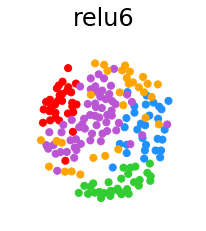

In [109]:
incl_layers = [layer for layer in layers if 'relu' in layer][5]
anim_size_texform_mds('originals_with_mc',incl_layers,figsize=(20,20),dotsize=50)

## relu7, layer containing integrated scene area

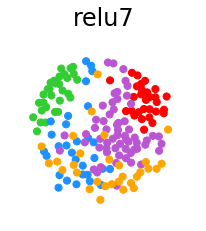

In [111]:
incl_layers = [layer for layer in layers if 'relu' in layer][6]
anim_size_texform_mds('originals_with_mc',incl_layers,figsize=(20,20),dotsize=50)